In [5]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3

In [6]:
from ultralytics import YOLO
from roboflow import Roboflow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
rf = Roboflow(api_key="WhkO46oGArsxkjHLp95p")
project = rf.workspace("indianfood").project("indian_food-pwzlc")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Indian_food-2 in yolov8:: 100%|██████████| 3910/3910 [00:00<00:00, 10031.23it/s]


In [8]:
model = YOLO("yolov8n.pt")

In [9]:
# Train on your food dataset
model.train(
    data=dataset.location + "/data.yaml",  # path to data.yaml
    epochs=50,                             # you can increase if needed
    imgsz=640                              # image size
)

Ultralytics 8.3.180 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Indian_food-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,012,213 parameters, 3,012,197 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 815.1±359.2 MB/s, size: 23.4 KB)


train: Scanning /content/Indian_food-2/train/labels... 1698 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1698/1698 [00:00<00:00, 2549.39it/s]

train: New cache created: /content/Indian_food-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 516.9±281.4 MB/s, size: 26.5 KB)


val: Scanning /content/Indian_food-2/valid/labels... 159 images, 0 backgrounds, 0 corrupt: 100%|██████████| 159/159 [00:00<00:00, 2132.46it/s]

val: New cache created: /content/Indian_food-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.13G      1.046      2.768      1.507          3        640: 100%|██████████| 107/107 [00:30<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

                   all        159        339      0.435      0.519      0.419      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.62G      1.017       1.84      1.469          9        640: 100%|██████████| 107/107 [00:28<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

                   all        159        339      0.332      0.484      0.356      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.63G      1.027      1.699      1.455          8        640: 100%|██████████| 107/107 [00:27<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]

                   all        159        339      0.548      0.555      0.523      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.66G      1.013      1.552      1.428         11        640: 100%|██████████| 107/107 [00:27<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.93it/s]

                   all        159        339      0.634       0.57      0.604      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.68G     0.9842      1.471      1.415          9        640: 100%|██████████| 107/107 [00:28<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        159        339      0.783      0.585      0.709      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.69G     0.9546      1.335      1.381          8        640: 100%|██████████| 107/107 [00:27<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all        159        339        0.7      0.612      0.706      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.7G     0.9373      1.268      1.361          7        640: 100%|██████████| 107/107 [00:27<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        159        339      0.714      0.706      0.765       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.73G     0.9356      1.244      1.361         11        640: 100%|██████████| 107/107 [00:27<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]

                   all        159        339      0.755      0.773      0.834      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.74G     0.9134      1.172      1.345          9        640: 100%|██████████| 107/107 [00:27<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all        159        339      0.718      0.727      0.773      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.76G     0.9005      1.126      1.334          7        640: 100%|██████████| 107/107 [00:27<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        159        339      0.835      0.762      0.858      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.77G     0.8837      1.059      1.313         15        640: 100%|██████████| 107/107 [00:27<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.96it/s]

                   all        159        339      0.792      0.766      0.832      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.8G     0.8895      1.058      1.314         11        640: 100%|██████████| 107/107 [00:29<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.87it/s]

                   all        159        339      0.788       0.72      0.817      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.81G     0.8578      1.019      1.297         13        640: 100%|██████████| 107/107 [00:27<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

                   all        159        339      0.853      0.759      0.851      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.83G     0.8492     0.9947      1.296          5        640: 100%|██████████| 107/107 [00:28<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.33it/s]

                   all        159        339      0.842      0.799      0.867      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.84G     0.8413     0.9398      1.276         15        640: 100%|██████████| 107/107 [00:28<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        159        339      0.841       0.78      0.854      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.86G     0.8195     0.9141      1.274         10        640: 100%|██████████| 107/107 [00:27<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        159        339      0.934      0.726      0.873      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.88G     0.8383     0.9162       1.27          5        640: 100%|██████████| 107/107 [00:27<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all        159        339      0.809      0.789      0.842      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.9G     0.8308     0.9008      1.274         11        640: 100%|██████████| 107/107 [00:27<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

                   all        159        339      0.787      0.759      0.824      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.9G     0.8063     0.8632      1.253         10        640: 100%|██████████| 107/107 [00:27<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.90it/s]

                   all        159        339      0.876      0.815      0.895      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.93G     0.7998     0.8377      1.253         11        640: 100%|██████████| 107/107 [00:27<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all        159        339      0.856      0.807      0.887      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.95G     0.8063     0.8376      1.239         11        640: 100%|██████████| 107/107 [00:27<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]

                   all        159        339        0.8      0.845      0.898      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.96G     0.7861     0.8105      1.235          8        640: 100%|██████████| 107/107 [00:27<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]

                   all        159        339      0.823      0.809      0.877      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.97G     0.7759     0.7977      1.239          4        640: 100%|██████████| 107/107 [00:27<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        159        339      0.908      0.861      0.911      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         3G     0.7756     0.7946      1.234          9        640: 100%|██████████| 107/107 [00:27<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]

                   all        159        339      0.825      0.809      0.869      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.02G     0.7622     0.7537      1.215         10        640: 100%|██████████| 107/107 [00:28<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        159        339      0.841      0.824      0.881      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.04G     0.7395     0.7477      1.204         11        640: 100%|██████████| 107/107 [00:27<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.08it/s]

                   all        159        339      0.865       0.81       0.88      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.04G     0.7461     0.7442      1.204         13        640: 100%|██████████| 107/107 [00:27<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        159        339      0.842      0.854      0.891       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.07G     0.7306     0.7042      1.192         12        640: 100%|██████████| 107/107 [00:27<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]

                   all        159        339      0.871      0.852      0.909      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.08G     0.7345      0.709      1.192          4        640: 100%|██████████| 107/107 [00:27<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        159        339      0.869      0.845      0.896      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.1G     0.7232     0.6995      1.189         12        640: 100%|██████████| 107/107 [00:27<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]

                   all        159        339      0.906      0.848      0.914       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.11G     0.7237     0.6803      1.189          7        640: 100%|██████████| 107/107 [00:27<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.44it/s]

                   all        159        339      0.889      0.848      0.909      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.14G     0.7174     0.6801      1.188         11        640: 100%|██████████| 107/107 [00:27<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.81it/s]

                   all        159        339      0.912      0.826      0.905       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.15G     0.6808     0.6511      1.159          5        640: 100%|██████████| 107/107 [00:27<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.62it/s]

                   all        159        339      0.891       0.85      0.916      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.17G     0.6885     0.6395       1.17         14        640: 100%|██████████| 107/107 [00:27<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.04it/s]

                   all        159        339      0.867      0.875      0.912      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.18G     0.6843     0.6351      1.159         13        640: 100%|██████████| 107/107 [00:27<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]

                   all        159        339      0.858      0.805      0.883      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       3.2G     0.6903      0.635      1.164          4        640: 100%|██████████| 107/107 [00:27<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]

                   all        159        339       0.91      0.882      0.937      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.22G     0.6871     0.6038       1.16          6        640: 100%|██████████| 107/107 [00:27<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]

                   all        159        339      0.927      0.858      0.929      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.24G     0.6642     0.6128      1.147          7        640: 100%|██████████| 107/107 [00:27<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

                   all        159        339      0.913      0.887      0.931      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.25G     0.6613     0.5968      1.152         10        640: 100%|██████████| 107/107 [00:27<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]

                   all        159        339      0.951      0.852       0.93      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.27G     0.6555     0.5913      1.139         11        640: 100%|██████████| 107/107 [00:27<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]

                   all        159        339      0.918      0.865      0.922      0.722


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.29G     0.5938     0.4841      1.112          3        640: 100%|██████████| 107/107 [00:27<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.32it/s]

                   all        159        339       0.91      0.881      0.929      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.31G     0.5882     0.4567      1.113          4        640: 100%|██████████| 107/107 [00:26<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]

                   all        159        339      0.912      0.862      0.923       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.31G     0.5804     0.4707      1.097         11        640: 100%|██████████| 107/107 [00:26<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.88it/s]

                   all        159        339      0.907      0.869      0.932      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.34G     0.5429      0.412      1.073          6        640: 100%|██████████| 107/107 [00:26<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.83it/s]

                   all        159        339      0.943      0.866      0.937      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.36G      0.549     0.4173      1.081          9        640: 100%|██████████| 107/107 [00:26<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all        159        339      0.931      0.872      0.937      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.38G     0.5342     0.3982       1.06          7        640: 100%|██████████| 107/107 [00:26<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        159        339      0.914      0.861      0.934      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.38G     0.5291     0.3895      1.063          7        640: 100%|██████████| 107/107 [00:26<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.52it/s]

                   all        159        339      0.906      0.886      0.935      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.41G     0.5184     0.3869      1.054          8        640: 100%|██████████| 107/107 [00:26<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]

                   all        159        339       0.91      0.875      0.933      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.43G     0.5101     0.3667      1.046          7        640: 100%|██████████| 107/107 [00:26<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all        159        339      0.928      0.882      0.933      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.44G     0.5012     0.3676      1.046          6        640: 100%|██████████| 107/107 [00:26<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]

                   all        159        339       0.93      0.875      0.936       0.76



50 epochs completed in 0.409 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


                   all        159        339      0.929      0.882      0.933      0.761
          besan_cheela         22         40      0.781      0.775      0.831      0.657
                  dosa         27         39      0.981      0.692        0.9      0.675
           gulab_jamun          9         47      0.965      0.957      0.964      0.771
                  idli         12         53      0.922      0.943      0.943      0.794
          palak_paneer         38         39      0.948      0.932      0.971      0.864
                  poha         37         43      0.974          1      0.992      0.898
                samosa         14         78      0.928      0.872      0.933       0.67
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ca18b568410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [12]:
# Run prediction on a test image
results = model.predict(source="/content/Indian_food-2/test/images", show=True, conf=0.5)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


image 1/92 /content/Indian_food-2/test/images/Dosa100_jpg.rf.9f1a2beffc405fc6d0e97fa302d5b618.jpg: 640x640 1 dosa, 17.0ms
image 2/92 /content/Indian_food-2/test/images/Dosa113_jpg.rf.6d0c8b17c93694fd478be779afc6bdc8.jpg: 640x640 1 dosa, 11.4ms
image 3/92 /content/Indian_food-2/test/images/Dosa148_jpg.rf.04f4ea191ccaca87db42cf8c4233a14d.jpg: 640x640 2 dosas, 8.0ms
image 4/92 /content/Indian_food-2/test/images/Dosa169_jpg.rf.1e043c55baf9ab34a9b892196f0c9d68.jpg: 640x640 3 dosas, 2 samosas, 8.0ms
image 5/92 /content/Indian_food-2/test/images/Dosa180_jpg.rf.187a6b4b57f0c72950c9cd26172f0dff.jpg: 640x640 1 dosa, 8.7ms
image 6/92 /content/Indian_food-2/test/images/Dosa183_jpg.rf.fbc1afdecdafecdfc068ea70ddcf8901.jpg: 640x640 1 dosa, 8.0ms
image 7/92 /content/Indian_food-2/test/images/Dosa190_jpg.rf.dd85cbcb2de73fa9b4e1c51daa2c7908.jpg: 640x640 2 besan_cheelas, 8.0ms
image 8/92 /content/Indian_food-2/test/images/Dosa1_jp

In [ ]:
model = YOLO("yolov8n.pt")

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/

In [13]:
# copy best weights into Drive for permanent storage
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/

In [14]:
from ultralytics import YOLO

# load the trained model
model = YOLO("/content/drive/MyDrive/best.pt")

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Dosa-Recipe-3.jpg to Dosa-Recipe-3 (1).jpg


Saving Dosa-Recipe-3.jpg to Dosa-Recipe-3 (2).jpg
['Dosa-Recipe-3 (2).jpg']

image 1/1 /content/Dosa-Recipe-3 (2).jpg: 640x640 2 dosas, 8.3ms
Speed: 5.3ms preprocess, 8.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


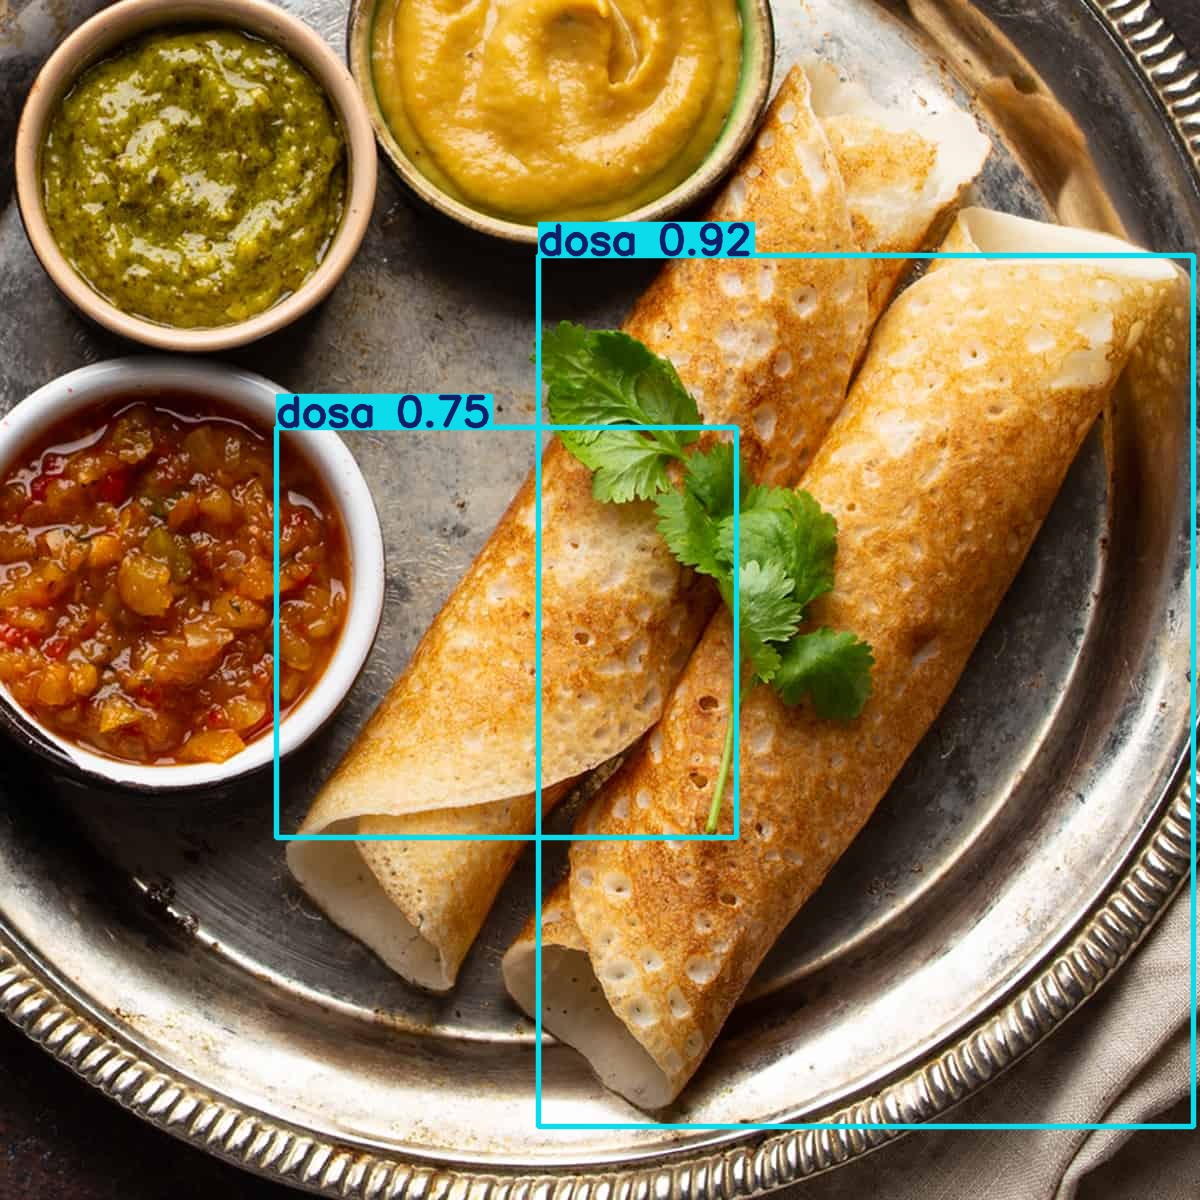

In [19]:
from google.colab import files

uploaded = files.upload()  # choose your image (mytest.jpg)

# check uploaded filename
import os
print(list(uploaded.keys()))

# run prediction
results = model.predict(source=list(uploaded.keys())[0], conf=0.5, save=True)
results[0].show()